In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
# load datasets
data_2d = pd.read_csv('data_2d.csv')


mnist = pd.read_csv('mnist.csv')

print(data_2d.head())
print(mnist.head())

   0.000000000000000000e+00  -7.687164597386728637e-01  \
0                       0.0                   2.687848   
1                       0.0                  -0.201379   
2                       0.0                   0.608496   
3                       0.0                  -0.082282   
4                       0.0                   2.083069   

   4.608603078297135447e-01  
0                  2.366961  
1                  0.470430  
2                  1.225400  
3                  1.137218  
4                  2.694482  
   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661

In [4]:
# Вилучення першого стовпця (мітки класу)
data_2d_features = data_2d.iloc[:, 1:]

# Стандартизація даних
scaler = StandardScaler()
data_2d_scaled = scaler.fit_transform(data_2d)
mnist_scaled = scaler.fit_transform(mnist)

# Знаходження оптимальної кількості кластерів для датасету "data_2d.csv"
silhouette_scores_2d = []
for n_clusters in range(2, 11):
    kmeans_2d = KMeans(n_clusters=n_clusters)
    kmeans_2d.fit(data_2d_features)
    silhouette_scores_2d.append(silhouette_score(data_2d_features, kmeans_2d.labels_))

print(silhouette_scores_2d)

D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\A

[0.47990644830873336, 0.3786578597613909, 0.38165863487276847, 0.3652959351269434, 0.3770962316683549, 0.3600901649239329, 0.3422021910609393, 0.3412557610967264, 0.33892513475232794]


In [5]:
# Знаходження оптимальної кількості кластерів для датасету "mnist.csv"
from sklearn.decomposition import PCA

# Використання PCA для зменшення розмірності даних до 2D
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist)

# Застосування K-means для датасету "mnist.csv" після PCA
silhouette_scores_mnist_pca = []
for n_clusters in range(2, 11):
    kmeans_mnist_pca = KMeans(n_clusters=n_clusters)
    kmeans_mnist_pca.fit(mnist_pca)
    silhouette_scores_mnist_pca.append(silhouette_score(mnist_pca, kmeans_mnist_pca.labels_))
print(silhouette_scores_mnist_pca)

D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\A

[0.3287821522840226, 0.43247352789852456, 0.41449754680379786, 0.396821999163919, 0.40579845259229635, 0.3983662973851338, 0.3920486455009466, 0.3883979543169886, 0.3908856196160781]


In [17]:
# Застосування K-means для датасету "data_2d.csv"
kmeans = KMeans(
    n_clusters=2, init='random',
    n_init=1, max_iter=4, 
    tol=1e-04, random_state=2
)

In [18]:
# Застосування K-means для датасету "mnist.csv"
kmeans_mnist = KMeans(
    n_clusters=3, init='random',
    n_init=1, max_iter=4, 
    tol=1e-04, random_state=2
)

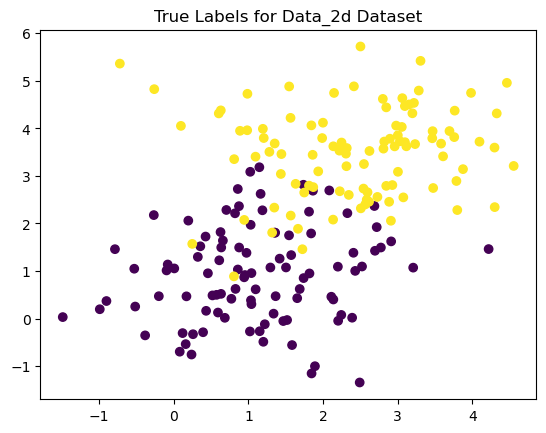

In [8]:
# Візуалізація результатів кластеризації
plt.scatter(data_2d.iloc[:, 1], data_2d.iloc[:, 2], c=data_2d.iloc[:, 0])
plt.title('True Labels for Data_2d Dataset')
plt.show()

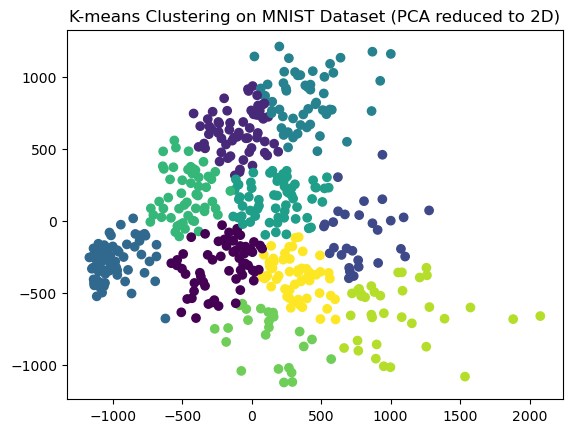

In [9]:
plt.scatter(mnist_pca[:, 0], mnist_pca[:, 1], c=kmeans_mnist_pca.labels_)
plt.title('K-means Clustering on MNIST Dataset (PCA reduced to 2D)')
plt.show()